In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.regression.linear_model as sm
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -q kaggle
from google.colab import files

files.upload()

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 6.09MB/s]


In [8]:
!unzip heart-disease-uci.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [2]:
!ls

heart.csv  heart-disease-uci.zip  kaggle.json  sample_data


In [0]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



# Columnas
1. Age: Edad de paciente
2. Sex: Sexo del paciente (1=Hombre, 0=Mujer)
3. Cp: Dolor en el pecho (1=,2=,3=)
4. Trestbps: Estudio en descanso de la presion de sangre 
5. Col: Colesterol en sangre
6. Fbs: Azucar en sangre en ayuno (1 = >120 mg/dl, 0 = no supera)
7. Restecg: Estudio en descanso cardiografico (1=positivo,0=negativo)
8. Thalanch: Maximo bps 
9. Exang: Angina inducida por ejercicio (1 = si, 0 = no)
10. Oldpeak: Depresion inducida en ejercicio con respecto a en descanso
11. Slope: Pendiente del maximo del BPS 
12. Ca: Numero de vasos sanguineos mayores coloreados en flouroscopia
13. Thal: Precencia de thalassemia (0=normal, 1=arreglado, 2=reversible)
14. Target: Existencia de problema cardiaco (1=Positivo, 0=Negativo)


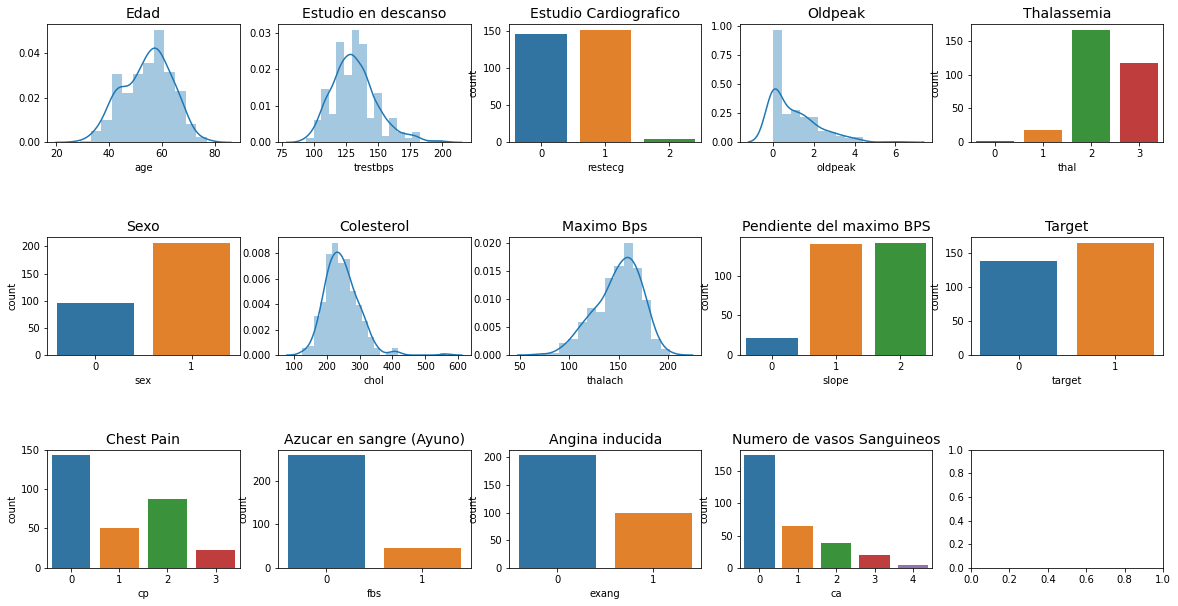

In [5]:
#Distribuciones
fig, ax = plt.subplots(3,5,figsize=(20,10))
plt.subplots_adjust(hspace = 0.8)
columnas = df.columns

sns.distplot(df[columnas[0]],ax=ax[0][0]);
ax[0][0].set_title('Edad', fontsize=14)
sns.countplot(df[columnas[1]],ax=ax[1][0]);
ax[1][0].set_title('Sexo',fontsize=14)
sns.countplot(df[columnas[2]],ax=ax[2][0]);
ax[2][0].set_title('Chest Pain',fontsize=14)
sns.distplot(df[columnas[3]],ax=ax[0][1]);
ax[0][1].set_title('Estudio en descanso',fontsize=14)
sns.distplot(df[columnas[4]],ax=ax[1][1]);
ax[1][1].set_title('Colesterol',fontsize=14)
sns.countplot(df[columnas[5]],ax=ax[2][1]);
ax[2][1].set_title('Azucar en sangre (Ayuno)',fontsize=14)
sns.countplot(df[columnas[6]],ax=ax[0][2]);
ax[0][2].set_title('Estudio Cardiografico',fontsize=14)
sns.distplot(df[columnas[7]],ax=ax[1][2]);
ax[1][2].set_title('Maximo Bps',fontsize=14)
sns.countplot(df[columnas[8]],ax=ax[2][2]);
ax[2][2].set_title('Angina inducida',fontsize=14)
sns.distplot(df[columnas[9]],ax=ax[0][3]);
ax[0][3].set_title('Oldpeak',fontsize=14)
sns.countplot(df[columnas[10]],ax=ax[1][3]);
ax[1][3].set_title('Pendiente del maximo BPS',fontsize=14)
sns.countplot(df[columnas[11]],ax=ax[2][3]);
ax[2][3].set_title('Numero de vasos Sanguineos',fontsize=14)
sns.countplot(df[columnas[12]],ax=ax[0][4]);
ax[0][4].set_title('Thalassemia',fontsize=14)
sns.countplot(df[columnas[13]],ax=ax[1][4]);
ax[1][4].set_title('Target',fontsize=14)
plt.show()

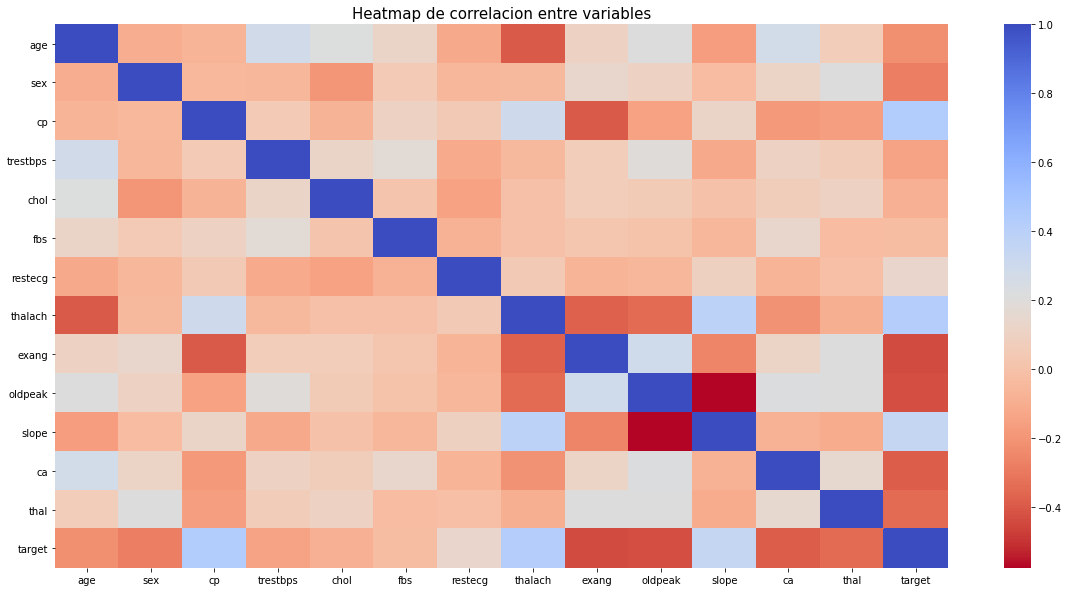

In [6]:
corr = df.corr()

fig, ax = plt.subplots(1,1,figsize=(20,10))

sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':50})
ax.set_title('Heatmap de correlacion entre variables', fontsize=15)
plt.show()

#Preprocesamiento

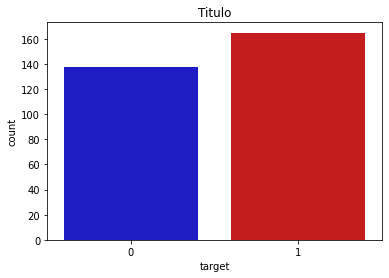

In [7]:
sns.countplot('target', data=df,palette=['#0101DF','#DF0101']) #Balanceado, no aplico ningun metodo de balanceo
plt.title('Titulo')
plt.show()

In [0]:
df2 = df.copy()

In [0]:
#paso los categoricos a numericos (dropeando 1)

df2['dolor angina normal'] = df['cp'] == 1 
df2['dolor angina atipica'] = df['cp'] == 2 
df2['dolor no anginal'] = df['cp'] == 3 
df2 = df2.drop('cp', axis=1)
#4 es sin dolor -> 0 0 0
df2['rcg_abnormalidad_1'] = df['restecg'] == 1 
df2['rcg_abnormalidad_2'] = df['restecg'] == 2 
df2 = df2.drop('restecg',axis=1)
#tipo 0 es normal -> 0 0
df2['thal_defecto_corregido'] = df['thal'] == 2 
df2['thal_defecto_reversible'] = df['thal'] == 3 
df2 = df2.drop('thal',axis=1)
#tipo 1 es normal -> 0 0
df2['slope_subiendo'] = df['slope'] == 1 
df2['slope_bajando'] = df['slope'] == 3
df2 = df2.drop('slope',axis=1)
#sin curva == 2 -> 0 0

df2 = df2*1 #booleans to ints

In [10]:
df2.head() #terminado

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,dolor angina normal,dolor angina atipica,dolor no anginal,rcg_abnormalidad_1,rcg_abnormalidad_2,thal_defecto_corregido,thal_defecto_reversible,slope_subiendo,slope_bajando
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,1,0,1,0,0,0


In [12]:
#checkeo por variables con baja correlacion (Aunque con el heatmap casi aseguro que no hay)
X = df2.iloc[:,0:19]
Xlen = X.shape[0]
Xones = np.ones(Xlen).reshape(-1,1)
X.insert(0, 'Const', Xones)
X.head()

(303, 19)
(303, 20)


,Const,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,dolor angina normal,dolor angina atipica,dolor no anginal,rcg_abnormalidad_1,rcg_abnormalidad_2,thal_defecto_corregido,thal_defecto_reversible,slope_subiendo,slope_bajando
0,1.0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,0,0,0,0
1,1.0,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,1,0,0,0
2,1.0,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,0
3,1.0,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,1,0,0,0
4,1.0,57,0,120,354,0,163,1,0.6,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,57,0,140,241,0,123,1,0.2,0,0,0,0,0,1,0,0,1,1,0
299,1.0,45,1,110,264,0,132,0,1.2,0,0,0,0,1,1,0,0,1,1,0
300,1.0,68,1,144,193,1,141,0,3.4,2,0,0,0,0,1,0,0,1,1,0
301,1.0,57,1,130,131,0,115,1,1.2,1,0,0,0,0,1,0,0,1,1,0


In [13]:
X = X.drop('target', axis=1)
X.head()

,Const,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,dolor angina normal,dolor angina atipica,dolor no anginal,rcg_abnormalidad_1,rcg_abnormalidad_2,thal_defecto_corregido,thal_defecto_reversible,slope_subiendo,slope_bajando
0,1.0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,0,0,0,0
1,1.0,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,0
2,1.0,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,1,0,0,0
3,1.0,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,1,0,0,0
4,1.0,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,0,1,1,0
299,1.0,45,1,110,264,0,132,0,1.2,0,0,0,1,1,0,0,1,1,0
300,1.0,68,1,144,193,1,141,0,3.4,2,0,0,0,1,0,0,1,1,0
301,1.0,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,0,1,1,0


In [14]:
X = X.drop('Const', axis=1)

from sklearn.preprocessing import RobustScaler
rc = RobustScaler()

X['age'] = rc.fit_transform(X['age'].values.reshape(-1,1))
X['trestbps'] = rc.fit_transform(X['trestbps'].values.reshape(-1,1))
X['chol'] = rc.fit_transform(X['chol'].values.reshape(-1,1))
X['thalach'] = rc.fit_transform(X['thalach'].values.reshape(-1,1))
X['oldpeak'] = rc.fit_transform(X['oldpeak'].values.reshape(-1,1))
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,dolor angina normal,dolor angina atipica,dolor no anginal,rcg_abnormalidad_1,rcg_abnormalidad_2,thal_defecto_corregido,thal_defecto_reversible,slope_subiendo,slope_bajando
0,0.592593,1,0.75,-0.110236,1,-0.092308,0,0.9375,0,0,0,1,0,0,0,0,0,0
1,-1.333333,1,0.00,0.157480,0,1.046154,0,1.6875,0,0,1,0,1,0,1,0,0,0
2,-1.037037,0,0.00,-0.566929,0,0.584615,0,0.3750,0,1,0,0,0,0,1,0,0,0
3,0.074074,1,-0.50,-0.062992,0,0.769231,0,0.0000,0,1,0,0,1,0,1,0,0,0
4,0.148148,0,-0.50,1.795276,0,0.307692,1,-0.1250,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0,0.50,0.015748,0,-0.923077,1,-0.3750,0,0,0,0,1,0,0,1,1,0
299,-0.740741,1,-1.00,0.377953,0,-0.646154,0,0.2500,0,0,0,1,1,0,0,1,1,0
300,0.962963,1,0.70,-0.740157,1,-0.369231,0,1.6250,2,0,0,0,1,0,0,1,1,0
301,0.148148,1,0.00,-1.716535,0,-1.169231,1,0.2500,1,0,0,0,1,0,0,1,1,0


In [15]:
Xvals2 = X.values
print(Xvals2)
y = df['target'].values
y.size
Xvals2.shape

[[ 0.59259259  1.          0.75       ...  0.          0.
   0.        ]
 [-1.33333333  1.          0.         ...  0.          0.
   0.        ]
 [-1.03703704  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.96296296  1.          0.7        ...  1.          1.
   0.        ]
 [ 0.14814815  1.          0.         ...  1.          1.
   0.        ]
 [ 0.14814815  0.          0.         ...  0.          1.
   0.        ]]


(303, 18)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xvals2,y, test_size=0.2)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        23
           1       0.84      0.95      0.89        38

    accuracy                           0.85        61
   macro avg       0.86      0.82      0.83        61
weighted avg       0.86      0.85      0.85        61



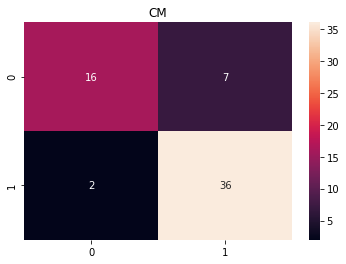

In [26]:
#Logistic Regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test,y_pred))
sns.heatmap(cm, annot=True)
plt.title('CM')
plt.show()


              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.84      0.84      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



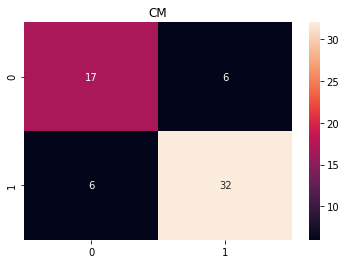

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier2.fit(X_train,y_train)

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)

print(classification_report(y_test,y_pred2))
sns.heatmap(cm2, annot=True)
plt.title('CM')
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.84      0.84      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



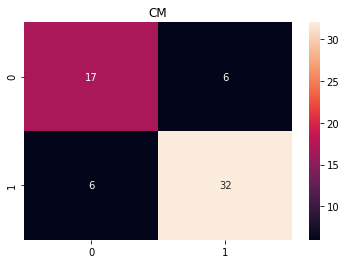

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)
classifier3.fit(X_train,y_train)

y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)

print(classification_report(y_test,y_pred3))
sns.heatmap(cm3, annot=True)
plt.title('CM')
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.30      0.44        23
           1       0.69      0.95      0.80        38

    accuracy                           0.70        61
   macro avg       0.74      0.63      0.62        61
weighted avg       0.72      0.70      0.66        61



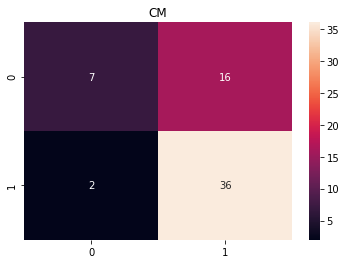

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train,y_train)

y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test,y_pred4)

print(classification_report(y_test,y_pred4))
sns.heatmap(cm4, annot=True)
plt.title('CM')
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.78      0.84      0.81        38

    accuracy                           0.75        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.75      0.75      0.75        61



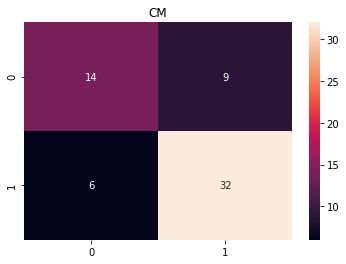

In [29]:
from sklearn.svm import SVC
classifier5 = SVC(kernel='rbf', random_state = 0, C=5)
classifier5.fit(X_train,y_train)

y_pred5 = classifier5.predict(X_test)
cm5 = confusion_matrix(y_test,y_pred5)

print(classification_report(y_test,y_pred5))
sns.heatmap(cm5, annot=True)
plt.title('CM')
plt.show()

In [30]:
!pip install pycaret
from pycaret.classification import * 

ERROR: Operation cancelled by user


KeyboardInterrupt: ignored

In [1]:
X.head()

NameError: ignored

In [24]:
X['Target'] = y
cf = setup(X,target='Target')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8014
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(303, 19)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
compare_models() #consistente con lo hecho previamente

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.839200,0.915800,0.875800,0.849500,0.854700,0.674400
1,Ridge Classifier,0.834800,0.000000,0.884800,0.835100,0.853100,0.664700
2,Extra Trees Classifier,0.830100,0.901500,0.859800,0.838400,0.845200,0.657200
3,Linear Discriminant Analysis,0.825300,0.909500,0.884800,0.822600,0.846200,0.645100
4,Light Gradient Boosting Machine,0.820600,0.878300,0.843200,0.841500,0.834800,0.639100
5,K Neighbors Classifier,0.820300,0.882200,0.858300,0.827300,0.837500,0.637300
6,Ada Boost Classifier,0.819700,0.871500,0.812900,0.840400,0.819700,0.639300
7,Gradient Boosting Classifier,0.801300,0.887800,0.816700,0.831600,0.815300,0.600600
8,Extreme Gradient Boosting,0.792400,0.882500,0.807600,0.815500,0.807400,0.582600
9,CatBoost Classifier,0.792400,0.892900,0.800000,0.826100,0.805900,0.583400
